# Stage de recherche - Développement de modules et tutoriaux pour la conception préliminaire d'avion sur Fast-OAD

### Stagiaires : Créelle Robbe, Dierge Martin
### Enseignant référent : Drougard Nicolas
### Tuteur de stage : Scott Delbecq

## Introduction
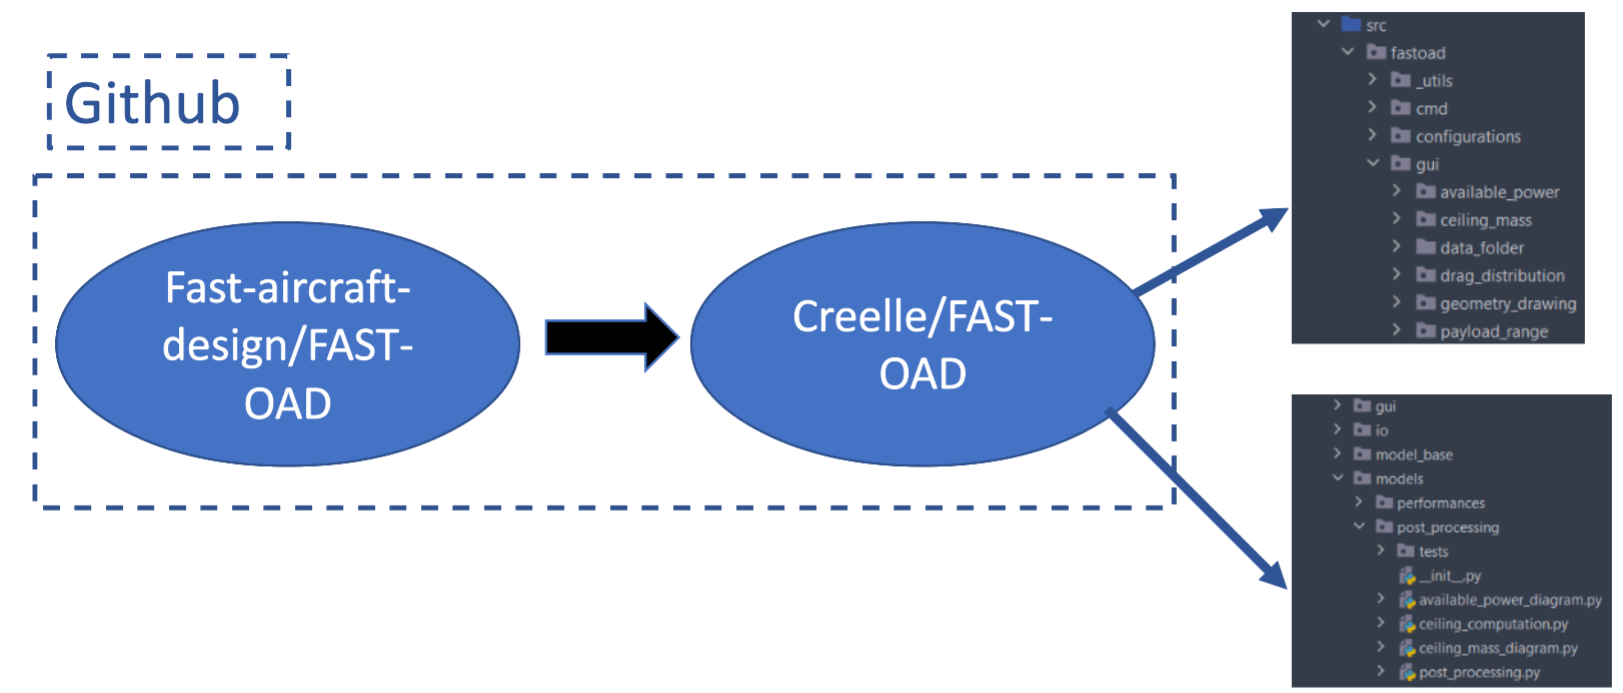

## Sommaire
   1. Full Aircraft Drawing
   2. Available Power Diagram
   3. Ceiling diagram
   4. Payload Range Diagram
   5. Drag Distribution
   6. Speed Alitude Diagram
   7. Stability Diagram (THS sizing)
   8. V-n Diagram
   9. Thrust/Max Thrust Plot 

In [ ]:
import os.path as pth
import fastoad.api as oad

DATA_FOLDER_PATH = "data_folder"

# Case 1 : outpput file given
OUTPUT_FILE = pth.join(DATA_FOLDER_PATH, "problem_outputs.xml")

# Case 2 : output file generated by oad.evaluate_problem(...)
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "data_post_processing.xml")
CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, "oad_process.yml")

oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)
eval_problem = oad.evaluate_problem(CONFIGURATION_FILE, overwrite=True)

OUTPUT_FILE_POST_PROCESSING = pth.join(DATA_FOLDER_PATH, "oad_process_outputs.xml")

# Full aircraft drawing

In [ ]:
oad.aircraft_drawing_top_view(OUTPUT_FILE).show()

In [ ]:
oad.aircraft_drawing_side_view(OUTPUT_FILE).show()

In [ ]:
oad.aircraft_drawing_front_view(OUTPUT_FILE).show()

In [ ]:
oad.flaps_and_slats_drawing(OUTPUT_FILE).show()

In [ ]:
oad.wing_drawing(OUTPUT_FILE)

# Available power Diagram

In [ ]:
oad.available_power_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING).show()

# Ceiling Diagram

In [ ]:
oad.ceiling_mass_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING).show()

# Payload Range Diagram

$Ra = k(Ra) \dfrac{V\cdot f}{Csr \cdot g} \log{\dfrac{mass_{start}}{mass_{end}}}$

In [ ]:
# Set up with an output file and an engine_id
OUTPUT_FILE = pth.join(DATA_FOLDER_PATH, "problem_outputs.xml")
engine_id = "fastoad.wrapper.propulsion.rubber_engine"

In [ ]:
# Simple payload range diagram

oad.payload_range_simple(
    aircraft_file_path=OUTPUT_FILE,
    propulsion_id=engine_id,
    name="Payload-Range Diagram",
    fig=None,
    color="blue",
).show()

In [ ]:
# Function to visualise the grid on the payload range diagram

oad.payload_range_grid_plot(
    aircraft_file_path=OUTPUT_FILE,
    propulsion_id=engine_id,
    n_intervals_payloads=8,
    range_step=250,
    upper_limit_box_tolerance=1.0,
    lower_limit_box_tolerance=0.4,
    right_limit_box_tolerance=1.0,
    left_limit_box_tolerance=0.1,
    show_grid=True,
    color="black",
).show()

In [ ]:
# Computation of a mission with a given (payload, range) on each grid point

# oad.payload_range_loop_computation(
#     aircraft_file_path=OUTPUT_FILE,
#     propulsion_id=engine_id,
#     n_intervals_payloads=3,
#     range_step=1000,
#     upper_limit_box_tolerance=1.0,
#     lower_limit_box_tolerance=0.4,
#     right_limit_box_tolerance=1.0,
#     left_limit_box_tolerance=0.1,
#     workdir_path = "workdir",
#     file_save_folder = "data_folder\data_results_payload",
#     file_save="loop_results.txt",
# )
# ==> Problème avec les paths
# Plot the results

fig = oad.payload_range_full(
    aircraft_file_path=OUTPUT_FILE,
    propulsion_id=engine_id,
    sizing_name="sizing",
    name=None,
    fig=None,
    file_formatter=None,
    file_save_folder="data_folder\data_results_payload",
    file_save="loop_results.txt",
    show_grid=True,
    x_axis=[0, 5000],
    y_axis=[0, 25],
)
fig.show()

In [ ]:
# Bigger computation result : 95 points
OUTPUT_FILE_PR = "..\payload_range\output_data\problem_outputs.xml"
fig = oad.payload_range_full(
    aircraft_file_path=OUTPUT_FILE_PR,
    propulsion_id=engine_id,
    sizing_name="sizing",
    name=None,
    fig=None,
    file_formatter=None,
    file_save_folder="..\payload_range\data",
    file_save="95_points_results.txt",
    show_grid=None,
    x_axis=[0, 5000],
    y_axis=[0, 25],
)
fig.show()

# Drag Distribution

$Cd = Cd_p + k_{ind} \cdot Cl^2 + Cd_{trim} + (Cd_c)$

In [ ]:
# Drag distribution during cruise (example)

oad.drag_distribution_plot(
    OUTPUT_FILE,
    aircraft_mass=70000,
    aircraft_altitude=10668,
    low_speed_aero=False,
    CL=None,
    name="Plane name",
    file_formatter=None,
).show()

In [ ]:
# Drag distribution during landing (low speed aero)

oad.drag_distribution_plot(
    OUTPUT_FILE,
    aircraft_mass=40000,
    aircraft_altitude=0,
    low_speed_aero=True,
    CL=None,
    name="Plane name",
    file_formatter=None,
).show()

In [ ]:
# By putting direct the lift coefficient in input

oad.drag_distribution_plot(
    OUTPUT_FILE,
    aircraft_mass=None,
    aircraft_altitude=None,
    low_speed_aero=False,
    CL=0.5,
    name="Plane name",
    file_formatter=None,
).show()

# Speed Altitude Diagram

In [ ]:
oad.speed_altitude_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING).show()

# Stability Diagram

In [ ]:
# THS sizing (not fully completed)
oad.stability_diagram_plot(OUTPUT_FILE).show()

# V-n Diagram

In [ ]:
oad.v_n_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING).show()

# Thrust/Max Thrust plot

In [ ]:
oad.thrust_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING)[0].show()

In [ ]:
oad.thrust_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING)[1].show()

In [ ]:
oad.thrust_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING)[2].show()

In [ ]:
oad.thrust_diagram_drawing_plot(OUTPUT_FILE_POST_PROCESSING)[3].show()

# Remerciements : 

### Scott Delbecq
### Florent Lutz
### Thomas Planès

# Remarques

There are some points where there is still work to be done:

1) For the payload_range_loop_computatation(...) in the payload range chapter, this function uses a mission_configuration_file.yml where the input and output files are defined. This file is contained in the "workir" folder. Whenever this functions is called, the "workdir folder souldbe in the same folder than wherethe notebook or python file is.

2) For the wing_lift_distribution(...), some parameters such as the zero lift angle of attack are found calling Xfoil on a certain wing profile defined in a txt file. But when calling Xfoil in the wing lift distribution model, then the results are wrong since the wing profile is deformed. Ideally,  it would be possible to call xfoil and calculate the zero lift AoA for various airfoils. In this case, the zero lift AoA is set to -1°

3) For the stability_diagram_plot() in the stability diagram chapter, there remains a criterion which will set a forward limit for the CG. This criterion is the forward pushover at 0.5g but it is not clear at which speed this is done.